In [4]:
import numpy as np
import wave
import struct
from matplotlib import pyplot as plt
import IPython.display as display
import scipy.integrate as integrate

In [5]:
dirname = './data/'
dirname

'./data/'

In [94]:
samplerate = 44100

def dummy(x):
    return x
    
def complex_amplitude(x):
    return 2 * x / np.pi

def sine_wave(samplerate=samplerate, duration=1, frequency=440.0, amplitude=1, phase=0.0, amplitude_func=dummy, m=0.2, fm=0, am=0):    
    t = np.full(samplerate * duration, phase + (2 * np.pi * frequency / samplerate)).cumsum()
    return (1 + m * am) * amplitude_func(amplitude) * np.sin(t + fm)

def triangular_wave(samplerate=samplerate, duration=1,frequency=440.0, amplitude=1, phase=0.0, amplitude_func=complex_amplitude, m=0.2, fm=0, am=0):     
    t = np.full(samplerate * duration, phase + (2 * np.pi * frequency / samplerate)).cumsum()
    return (1+ m * am) * amplitude_func(amplitude) * np.arcsin(np.sin(t + fm))

def sawtooth_wave(samplerate=samplerate, duration=1, frequency=440.0, amplitude=1, phase=0.0, amplitude_func=complex_amplitude, m=0.2, fm=0, am=0):
    t = np.full(samplerate * duration, phase + (2 * np.pi * frequency / samplerate)).cumsum()
    return (1+ m * am) * amplitude_func(amplitude) * np.arctan(np.tan(t + fm))

def pulse_wave(samplerate=samplerate, duration=1, duty=0.5, frequency=440.0, amplitude=1, phase=0.0,amplitude_func=dummy, m=0.2, fm=0, am=0):
    fi = phase
    values = []
    for i in range(samplerate * duration):
        fi += 2 * np.pi * frequency / samplerate + (fm[0] if isinstance(fm, np.ndarray) else 0)
        values.append( ((np.sin(fi) + 1) >= (2*duty)).astype(float)  )
#         print(np.sin(fi))
    return values
    
def noise(samplerate=samplerate, N = 1, amplitude = 1):
    return amplitude * np.random.random(samplerate * N)

from inspect import signature
def poly_wave(values, samplerate=samplerate, duration=1):
    poly = np.zeros(samplerate * duration)
    for i in range(len(values)):
        poly = np.sum([poly, values[i]],axis=0)
    return poly, len(params)


In [68]:
def to_wavefile(filename, gen_wave, k=1, sampwidth=4, framerate=samplerate, nchannels=1):
    samples = to_data(gen_wave, sampwidth,k)
    w = wave.open(dirname + filename, 'w')
    w.setparams((nchannels, sampwidth, framerate, int(np.ceil(len(samples) / framerate)), 'NONE', 'not compressed'))
    
    w.writeframes(samples)
    w.close()

In [69]:
def to_data(wave, sampwidth, k=1):
    type_dict = {1: 'b', 2:'h', 4:'l', 8:'q'}
    volume = 2 ** (8*sampwidth-1) - 1
    data = bytearray()
    for value in wave:
        data += bytearray(struct.pack(f"<{type_dict[sampwidth]}", int(value * volume / k)))
    return data

## Sine

In [44]:
sin = sine_wave()

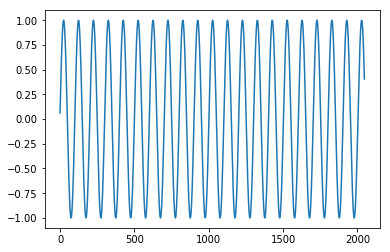

In [45]:
plt.plot(np.arange(0,2048), sin[:2048])

In [46]:
to_wavefile("sin.wav",sin)

In [47]:
display.Audio(url=dirname + 'sin.wav')

## Triangular

In [48]:
triangular = triangular_wave()

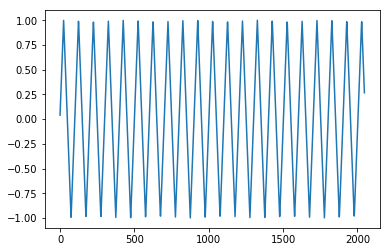

In [49]:
plt.plot(np.arange(0,2048), triangular[:2048])

In [50]:
to_wavefile("triangular.wav",triangular)

In [51]:
display.Audio(url=dirname + 'triangular.wav')

## Pulse

In [85]:
pulse = pulse_wave(duty=0.5)
pulse

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

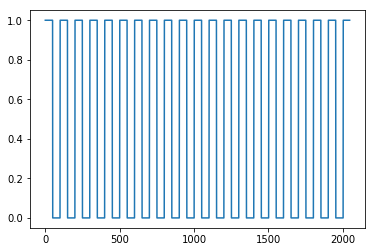

In [86]:
plt.plot(np.arange(0,2048), pulse[:2048])

In [87]:
to_wavefile("pulse.wav",pulse)

In [88]:
display.Audio(url=dirname + 'pulse.wav')

## Sawtooth

In [18]:
sawtooth = sawtooth_wave()

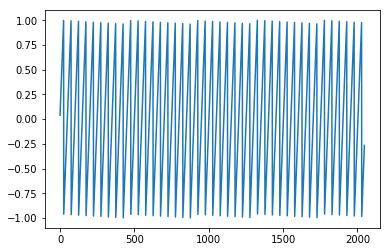

In [19]:
plt.plot(np.arange(0,2048), sawtooth[:2048])

In [20]:
to_wavefile("sawtooth.wav",sawtooth)

In [21]:
display.Audio(url=dirname + 'sawtooth.wav')

## Noise

In [22]:
noise_data = noise()

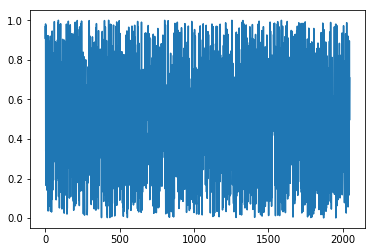

In [23]:
plt.plot(np.arange(0,2048), noise_data[:2048])

In [24]:
to_wavefile("noise.wav",noise_data)

In [25]:
display.Audio(url=dirname + 'noise.wav')

## Polyharmonic

In [26]:
params = [
    sine_wave(frequency=220,amplitude=1, phase=np.pi),
    sine_wave(frequency=300,amplitude=1, phase=2*np.pi),
    sine_wave(frequency=440,amplitude=1, phase=np.pi)
]
poly_sin, k = poly_wave(params)


In [27]:
poly_sin

array([-5.12581368e-02,  2.73080282e-01, -1.52979825e-01, ...,
       -2.73080144e-01,  5.12583338e-02,  1.38116140e-07])

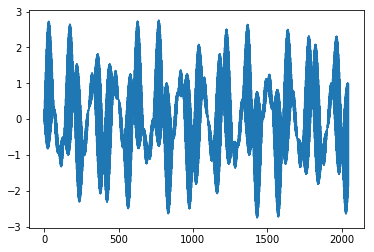

In [28]:
plt.plot(np.arange(0,2048), poly_sin[:2048])

In [29]:
to_wavefile("poly.wav",poly_sin,k)

In [30]:
display.Audio(url=dirname + 'poly.wav')

## Modulation

### AM

In [95]:
am = pulse_wave(frequency=1, amplitude_func=lambda x: 1,duration=5)
am_sine = sine_wave(frequency=440, am=am, m=1,duration=5)


TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [ ]:
plt.plot(np.arange(0,2048), am_sine[:2048])

In [33]:
to_wavefile("am_sin.wav",am_sine, k=2)

In [34]:
display.Audio(url=dirname + 'am_sin.wav')

### FM


In [96]:
fm = sawtooth_wave(amplitude_func=lambda x: 500,frequency=1,duration=5)
fm

array([ 7.12379287e-02,  1.42475857e-01,  2.13713786e-01, ...,
       -1.42475836e-01, -7.12379072e-02,  2.14506729e-08])

In [97]:
fm_sine = pulse_wave(frequency=440, fm=fm,duration=5)

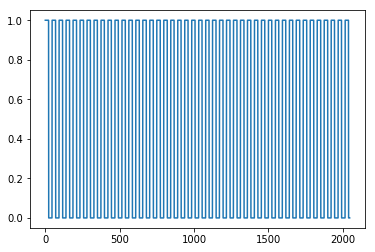

In [98]:
plt.plot(np.arange(0,2048), fm_sine[:2048])

In [99]:
to_wavefile("fm_sine.wav",fm_sine)

In [100]:
display.Audio(url=dirname + 'fm_sine.wav')